In [1]:
from crime_util import *
import warnings

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
crime_cols = ['violent_crime', 'murder', 'rape', 'robbery', 
              'assault', 'property_crime', 'burglary', 'larceny_theft', 
              'motor_vehicle_theft', 'arson']
florida = read_data(only_florida=True)
florida.shape

(255, 11)

In [3]:
florida = transform_data(florida)
florida, bc_lambda = boxcox_transform(florida)
bc_lambda

0.15868782903110912

In [4]:
train, test = split(florida)
print("Train shape: {}".format(train.shape))
print("Test shape: {}".format(test.shape))

Train shape: (178, 24)
Test shape: (77, 24)


In [5]:
train.population_group.value_counts()

1    112
3     21
2     21
4     14
5     10
Name: population_group, dtype: int64

In [6]:
test.population_group.value_counts()

1    47
2    21
3     6
5     2
4     1
Name: population_group, dtype: int64

*As the population seems to play a large role in crimes, this class imbalance could be an issue...*

In [9]:
model_vars = ['population_log', "population_group",  
              "burglary_cube_root", "larceny_theft_cube_root"]
model1 = build_evaluate_model(train, test, bc_lambda, model_vars)
model1_model = model1[0]
model1_resids_train = model1[1]
model1_resids_test = model1[2]

R-squared (after reverse property crime Box-Cox): 0.9099
Train
-------------------------------------------------------------

[0.98802228 0.99355375 0.98685684 0.99299431 0.9918634 ]
cv average is = 99.07%

BEFORE reversing predicted Box-Cox transform of property crime
Mean Residual: -0.00345
RMSE: 0.37

AFTER reversing predicted Box-Cox transform of property crime
Mean Residual: -15.832161302097354
RMSE: 117.39055717336542
Average Error: 49.873277619039975

Test
-------------------------------------------------------------

[0.9681024  0.97362241 0.972376   0.96850824 0.95885343]
cv average is = 96.83%

BEFORE reversing predicted Box-Cox transform of property crime
Mean Residual: -0.01390
RMSE: 0.53

AFTER reversing predicted Box-Cox transform of property crime
Mean Residual: -13.479515341914954
RMSE: 161.88815820579867
Average Error: 46.71692050547322



In [13]:
pls4 = build_evaluate_pls_model(train, test, 4, bc_lambda, model_vars)
pls4_model = pls6[0]
pls4_resids_train = pls6[1]
pls4_resids_test = pls6[2]

R-squared PLSR (Train): 0.9913736333392721
Train
-------------------------------------------------------------

[0.98802228 0.99355375 0.98685684 0.99299431 0.9918634 ]
cv average is = 99.07%

BEFORE reversing predicted Box-Cox transform of property crime
Mean Residual: -0.00345
RMSE: 0.37

AFTER reversing predicted Box-Cox transform of property crime
Mean Residual: -15.832161302097354
RMSE: 117.39055717336552
Average Error: 49.873277619040046

R-squared PLSR (Test): 0.9841260438735928
Test
-------------------------------------------------------------

[0.9681024  0.97362241 0.972376   0.96850824 0.95885343]
cv average is = 96.83%

BEFORE reversing predicted Box-Cox transform of property crime
Mean Residual: -0.01390
RMSE: 0.53

AFTER reversing predicted Box-Cox transform of property crime
Mean Residual: -13.479515341914619
RMSE: 161.88815820579853
Average Error: 46.716920505473304



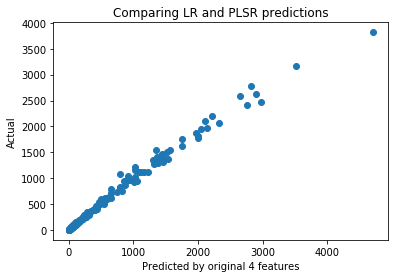

In [28]:
# Compare the predictions of the two models
plt.scatter(inv_boxcox(pls4_model.predict(train[model_vars]),bc_lambda), train["property_crime"])
plt.xlabel('Predicted by original 4 features')
plt.ylabel('Actual')
plt.title('Comparing LR and PLSR predictions')
plt.show()

In [14]:
pls3 = build_evaluate_pls_model(train, test, 3, bc_lambda, model_vars)
pls3_model = pls3[0]
pls3_resids_train = pls3[1]
pls3_resids_test = pls3[2]

R-squared PLSR (Train): 0.9911836217312561
Train
-------------------------------------------------------------

[0.98775704 0.99378863 0.98687837 0.99263187 0.99128869]
cv average is = 99.05%

BEFORE reversing predicted Box-Cox transform of property crime
Mean Residual: -0.00326
RMSE: 0.38

AFTER reversing predicted Box-Cox transform of property crime
Mean Residual: -17.672789259180472
RMSE: 129.973745158026
Average Error: 53.95833785754057

R-squared PLSR (Test): 0.9832855930303378
Test
-------------------------------------------------------------

[0.97889294 0.97854812 0.96565374 0.96396834 0.94040814]
cv average is = 96.55%

BEFORE reversing predicted Box-Cox transform of property crime
Mean Residual: -0.01556
RMSE: 0.50

AFTER reversing predicted Box-Cox transform of property crime
Mean Residual: -14.17683349029155
RMSE: 144.0415399179624
Average Error: 44.49565281931429



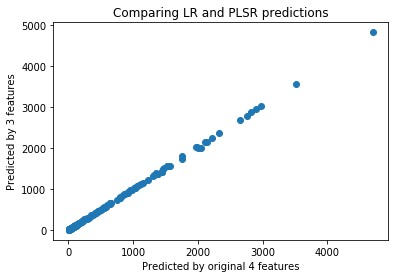

In [26]:
# Compare the predictions of the two models
plt.scatter(inv_boxcox(pls4_model.predict(train[model_vars]),bc_lambda), inv_boxcox(pls3_model.predict(train[model_vars]), bc_lambda))
plt.xlabel('Predicted by original 4 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

In [15]:
pls2 = build_evaluate_pls_model(train, test, 2, bc_lambda, model_vars)
pls2_model = pls2[0]
pls2_resids_train = pls2[1]
pls2_resids_test = pls2[2]

R-squared PLSR (Train): 0.9827013493892043
Train
-------------------------------------------------------------

[0.98058148 0.98046383 0.97511012 0.98389074 0.98614889]
cv average is = 98.12%

BEFORE reversing predicted Box-Cox transform of property crime
Mean Residual: -0.00217
RMSE: 0.51

AFTER reversing predicted Box-Cox transform of property crime
Mean Residual: -2.3628866553708603
RMSE: 106.95355232864826
Average Error: 59.48470886477599

R-squared PLSR (Test): 0.9734518413991314
Test
-------------------------------------------------------------

[0.96303415 0.97483089 0.96641051 0.96394405 0.92304388]
cv average is = 95.83%

BEFORE reversing predicted Box-Cox transform of property crime
Mean Residual: -0.01023
RMSE: 0.61

AFTER reversing predicted Box-Cox transform of property crime
Mean Residual: -5.5800234301524005
RMSE: 134.5503760869639
Average Error: 55.08427052553962



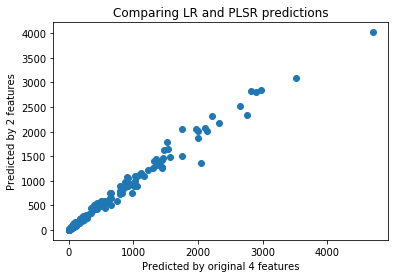

In [25]:
# Compare the predictions of the two models
plt.scatter(inv_boxcox(pls4_model.predict(train[model_vars]),bc_lambda), inv_boxcox(pls2_model.predict(train[model_vars]), bc_lambda))
plt.xlabel('Predicted by original 4 features')
plt.ylabel('Predicted by 2 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

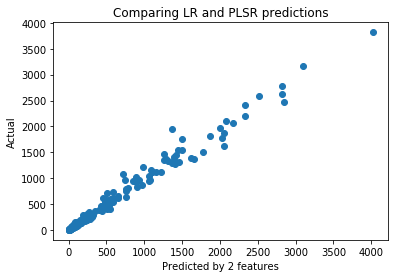

In [31]:
# Compare the predictions of the two models
plt.scatter(inv_boxcox(pls2_model.predict(train[model_vars]),bc_lambda), train["property_crime"])
plt.xlabel('Predicted by 2 features')
plt.ylabel('Actual')
plt.title('Comparing LR and PLSR predictions')
plt.show()

In assessing model performance, we are mainly concerned with it's performance out of sample (so on the test set). While PLSR may result in lower R-Squared values (as the number of components decreases), this does not necessarily result in higher RMSE's, particularly since we are predicting the Box-Cox transform of property crime. RMSE decreased from 161.9 to 144 and 134.5 when using 4, 3 and 2 components. For this dataset, PLSR is not necessary. 